In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import*

In [2]:
df = pd.read_csv("/content/Urban Air Quality and Health Impact Dataset (2).csv")
df

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,...,Phoenix,15.100000,95.918703,4.430000,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.900000,87.000000,95.400000,100.500000,84.700000,92.300000,48.700000,21.500000,...,Phoenix,16.900000,92.281316,3.880000,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.000000,83.900000,94.700000,99.900000,81.600000,90.600000,41.700000,16.900000,...,Phoenix,21.100000,90.599165,3.630000,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.100000,81.200000,93.900000,100.600000,79.500000,89.800000,39.100000,15.700000,...,Phoenix,24.900000,89.638811,2.851200,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.100000,82.100000,94.000000,101.000000,80.000000,90.000000,40.100000,15.900000,...,Phoenix,24.000000,89.760414,3.390800,0.0,9.0,Fall,Wednesday,False,9.515179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-09-18,1.726633e+09,76.060546,64.359387,69.002142,77.673823,63.510920,67.003338,59.936776,73.189130,...,Philadelphia,12.886665,71.837558,1.957318,NaN,9.0,Fall,Wednesday,False,8.750142
996,2024-09-17,1.726550e+09,68.409198,65.939319,66.567410,68.956722,64.805635,65.992526,59.010257,74.137401,...,San Diego,2.613629,72.463491,2.537413,0.0,9.0,Fall,Tuesday,False,9.118198
997,2024-09-12,1.726122e+09,69.756690,65.286919,65.919492,68.158536,63.662942,67.313322,62.024442,84.650482,...,San Diego,4.598936,67.560060,3.595470,NaN,9.0,Fall,Thursday,False,9.880093
998,2024-09-14,1.726284e+09,77.106797,61.481724,68.106569,76.426959,60.901526,68.094309,63.169608,86.860261,...,Los Angeles,15.477717,67.930437,3.498942,0.0,9.0,Fall,Saturday,True,9.561602


In [3]:
df.dtypes

,0
datetime,object
datetimeEpoch,float64
tempmax,float64
tempmin,float64
temp,float64
feelslikemax,float64
feelslikemin,float64
feelslike,float64
dew,float64
humidity,float64


In [4]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.dtypes

,0
datetime,datetime64[ns]
datetimeEpoch,float64
tempmax,float64
tempmin,float64
temp,float64
feelslikemax,float64
feelslikemin,float64
feelslike,float64
dew,float64
humidity,float64


In [5]:
df["Year"] = df["datetime"].dt.year

In [6]:
df["Month"] = df["datetime"].dt.month

In [7]:
df["Day"] = df["datetime"].dt.day

In [8]:
df

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score,Year,Day
0,2024-09-07,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,...,95.918703,4.430000,NaN,9,Fall,Saturday,True,10.522170,2024,7
1,2024-09-08,1.725779e+09,103.900000,87.000000,95.400000,100.500000,84.700000,92.300000,48.700000,21.500000,...,92.281316,3.880000,0.0,9,Fall,Sunday,True,10.062332,2024,8
2,2024-09-09,1.725865e+09,105.000000,83.900000,94.700000,99.900000,81.600000,90.600000,41.700000,16.900000,...,90.599165,3.630000,0.0,9,Fall,Monday,False,9.673387,2024,9
3,2024-09-10,1.725952e+09,106.100000,81.200000,93.900000,100.600000,79.500000,89.800000,39.100000,15.700000,...,89.638811,2.851200,0.0,9,Fall,Tuesday,False,9.411519,2024,10
4,2024-09-11,1.726038e+09,106.100000,82.100000,94.000000,101.000000,80.000000,90.000000,40.100000,15.900000,...,89.760414,3.390800,0.0,9,Fall,Wednesday,False,9.515179,2024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-09-18,1.726633e+09,76.060546,64.359387,69.002142,77.673823,63.510920,67.003338,59.936776,73.189130,...,71.837558,1.957318,NaN,9,Fall,Wednesday,False,8.750142,2024,18
996,2024-09-17,1.726550e+09,68.409198,65.939319,66.567410,68.956722,64.805635,65.992526,59.010257,74.137401,...,72.463491,2.537413,0.0,9,Fall,Tuesday,False,9.118198,2024,17
997,2024-09-12,1.726122e+09,69.756690,65.286919,65.919492,68.158536,63.662942,67.313322,62.024442,84.650482,...,67.560060,3.595470,NaN,9,Fall,Thursday,False,9.880093,2024,12
998,2024-09-14,1.726284e+09,77.106797,61.481724,68.106569,76.426959,60.901526,68.094309,63.169608,86.860261,...,67.930437,3.498942,0.0,9,Fall,Saturday,True,9.561602,2024,14


In [9]:
df.drop("datetime", axis = 1, inplace = True)
df

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score,Year,Day
0,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,0.000000,...,95.918703,4.430000,NaN,9,Fall,Saturday,True,10.522170,2024,7
1,1.725779e+09,103.900000,87.000000,95.400000,100.500000,84.700000,92.300000,48.700000,21.500000,0.000000,...,92.281316,3.880000,0.0,9,Fall,Sunday,True,10.062332,2024,8
2,1.725865e+09,105.000000,83.900000,94.700000,99.900000,81.600000,90.600000,41.700000,16.900000,0.000000,...,90.599165,3.630000,0.0,9,Fall,Monday,False,9.673387,2024,9
3,1.725952e+09,106.100000,81.200000,93.900000,100.600000,79.500000,89.800000,39.100000,15.700000,0.012000,...,89.638811,2.851200,0.0,9,Fall,Tuesday,False,9.411519,2024,10
4,1.726038e+09,106.100000,82.100000,94.000000,101.000000,80.000000,90.000000,40.100000,15.900000,0.008000,...,89.760414,3.390800,0.0,9,Fall,Wednesday,False,9.515179,2024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.726633e+09,76.060546,64.359387,69.002142,77.673823,63.510920,67.003338,59.936776,73.189130,0.084660,...,71.837558,1.957318,NaN,9,Fall,Wednesday,False,8.750142,2024,18
996,1.726550e+09,68.409198,65.939319,66.567410,68.956722,64.805635,65.992526,59.010257,74.137401,0.019847,...,72.463491,2.537413,0.0,9,Fall,Tuesday,False,9.118198,2024,17
997,1.726122e+09,69.756690,65.286919,65.919492,68.158536,63.662942,67.313322,62.024442,84.650482,-0.010133,...,67.560060,3.595470,NaN,9,Fall,Thursday,False,9.880093,2024,12
998,1.726284e+09,77.106797,61.481724,68.106569,76.426959,60.901526,68.094309,63.169608,86.860261,-0.002440,...,67.930437,3.498942,0.0,9,Fall,Saturday,True,9.561602,2024,14


In [10]:
df.dtypes

,0
datetimeEpoch,float64
tempmax,float64
tempmin,float64
temp,float64
feelslikemax,float64
feelslikemin,float64
feelslike,float64
dew,float64
humidity,float64
precip,float64


In [11]:
df.isna().sum()

,0
datetimeEpoch,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0
precip,0


In [12]:
df.fillna(0, inplace = True)
df.isna().sum()

,0
datetimeEpoch,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0
precip,0


In [13]:
df.dtypes

,0
datetimeEpoch,float64
tempmax,float64
tempmin,float64
temp,float64
feelslikemax,float64
feelslikemin,float64
feelslike,float64
dew,float64
humidity,float64
precip,float64


In [14]:
df["preciptype"].replace("['rain']", "1", inplace = True)
df

<ipython-input-14-5fa66bac0581>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["preciptype"].replace("['rain']", "1", inplace = True)


,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score,Year,Day
0,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,0.000000,...,95.918703,4.430000,0.0,9,Fall,Saturday,True,10.522170,2024,7
1,1.725779e+09,103.900000,87.000000,95.400000,100.500000,84.700000,92.300000,48.700000,21.500000,0.000000,...,92.281316,3.880000,0.0,9,Fall,Sunday,True,10.062332,2024,8
2,1.725865e+09,105.000000,83.900000,94.700000,99.900000,81.600000,90.600000,41.700000,16.900000,0.000000,...,90.599165,3.630000,0.0,9,Fall,Monday,False,9.673387,2024,9
3,1.725952e+09,106.100000,81.200000,93.900000,100.600000,79.500000,89.800000,39.100000,15.700000,0.012000,...,89.638811,2.851200,0.0,9,Fall,Tuesday,False,9.411519,2024,10
4,1.726038e+09,106.100000,82.100000,94.000000,101.000000,80.000000,90.000000,40.100000,15.900000,0.008000,...,89.760414,3.390800,0.0,9,Fall,Wednesday,False,9.515179,2024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.726633e+09,76.060546,64.359387,69.002142,77.673823,63.510920,67.003338,59.936776,73.189130,0.084660,...,71.837558,1.957318,0.0,9,Fall,Wednesday,False,8.750142,2024,18
996,1.726550e+09,68.409198,65.939319,66.567410,68.956722,64.805635,65.992526,59.010257,74.137401,0.019847,...,72.463491,2.537413,0.0,9,Fall,Tuesday,False,9.118198,2024,17
997,1.726122e+09,69.756690,65.286919,65.919492,68.158536,63.662942,67.313322,62.024442,84.650482,-0.010133,...,67.560060,3.595470,0.0,9,Fall,Thursday,False,9.880093,2024,12
998,1.726284e+09,77.106797,61.481724,68.106569,76.426959,60.901526,68.094309,63.169608,86.860261,-0.002440,...,67.930437,3.498942,0.0,9,Fall,Saturday,True,9.561602,2024,14


In [15]:
df["preciptype"] = pd.to_numeric(df["preciptype"])
df

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score,Year,Day
0,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,0.000000,...,95.918703,4.430000,0.0,9,Fall,Saturday,True,10.522170,2024,7
1,1.725779e+09,103.900000,87.000000,95.400000,100.500000,84.700000,92.300000,48.700000,21.500000,0.000000,...,92.281316,3.880000,0.0,9,Fall,Sunday,True,10.062332,2024,8
2,1.725865e+09,105.000000,83.900000,94.700000,99.900000,81.600000,90.600000,41.700000,16.900000,0.000000,...,90.599165,3.630000,0.0,9,Fall,Monday,False,9.673387,2024,9
3,1.725952e+09,106.100000,81.200000,93.900000,100.600000,79.500000,89.800000,39.100000,15.700000,0.012000,...,89.638811,2.851200,0.0,9,Fall,Tuesday,False,9.411519,2024,10
4,1.726038e+09,106.100000,82.100000,94.000000,101.000000,80.000000,90.000000,40.100000,15.900000,0.008000,...,89.760414,3.390800,0.0,9,Fall,Wednesday,False,9.515179,2024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.726633e+09,76.060546,64.359387,69.002142,77.673823,63.510920,67.003338,59.936776,73.189130,0.084660,...,71.837558,1.957318,0.0,9,Fall,Wednesday,False,8.750142,2024,18
996,1.726550e+09,68.409198,65.939319,66.567410,68.956722,64.805635,65.992526,59.010257,74.137401,0.019847,...,72.463491,2.537413,0.0,9,Fall,Tuesday,False,9.118198,2024,17
997,1.726122e+09,69.756690,65.286919,65.919492,68.158536,63.662942,67.313322,62.024442,84.650482,-0.010133,...,67.560060,3.595470,0.0,9,Fall,Thursday,False,9.880093,2024,12
998,1.726284e+09,77.106797,61.481724,68.106569,76.426959,60.901526,68.094309,63.169608,86.860261,-0.002440,...,67.930437,3.498942,0.0,9,Fall,Saturday,True,9.561602,2024,14


In [16]:
df.dtypes

,0
datetimeEpoch,float64
tempmax,float64
tempmin,float64
temp,float64
feelslikemax,float64
feelslikemin,float64
feelslike,float64
dew,float64
humidity,float64
precip,float64


In [17]:
df.drop("sunrise", axis = 1, inplace = True)

In [18]:
df["conditions"] = LabelEncoder().fit_transform(df["conditions"])

In [19]:
df["description"] = LabelEncoder().fit_transform(df["description"])

In [20]:
df["icon"] = LabelEncoder().fit_transform(df["icon"])

In [21]:
df.drop("stations", axis = 1, inplace = True)

In [22]:
df["source"] = LabelEncoder().fit_transform(df["source"])

In [23]:
df["City"] = LabelEncoder().fit_transform(df["City"])

In [24]:
df["Season"] = LabelEncoder().fit_transform(df["Season"])

In [25]:
df["Day_of_Week"] = LabelEncoder().fit_transform(df["Day_of_Week"])

In [26]:
df.drop("sunset", axis = 1, inplace = True)

In [27]:
df.dtypes

,0
datetimeEpoch,float64
tempmax,float64
tempmin,float64
temp,float64
feelslikemax,float64
feelslikemin,float64
feelslike,float64
dew,float64
humidity,float64
precip,float64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetimeEpoch      1000 non-null   float64
 1   tempmax            1000 non-null   float64
 2   tempmin            1000 non-null   float64
 3   temp               1000 non-null   float64
 4   feelslikemax       1000 non-null   float64
 5   feelslikemin       1000 non-null   float64
 6   feelslike          1000 non-null   float64
 7   dew                1000 non-null   float64
 8   humidity           1000 non-null   float64
 9   precip             1000 non-null   float64
 10  precipprob         1000 non-null   float64
 11  precipcover        1000 non-null   float64
 12  preciptype         1000 non-null   int64  
 13  snow               1000 non-null   float64
 14  snowdepth          1000 non-null   float64
 15  windgust           1000 non-null   float64
 16  windspeed          1000 n

In [29]:
df.describe()

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Health_Risk_Score,Year,Day
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0,1000.000000
mean,1.726284e+09,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,0.032135,...,16.469899,80.195613,3.057743,0.0,9.0,0.0,2.926000,9.729103,2024.0,13.910000
std,3.745834e+05,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,0.083461,...,5.552785,6.053805,0.624024,0.0,0.0,0.0,1.955594,0.679728,0.0,4.338747
min,1.725624e+09,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,-0.021213,...,1.676587,65.511677,1.578048,0.0,9.0,0.0,0.000000,8.492431,2024.0,7.000000
25%,1.725948e+09,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,-0.000511,...,13.319119,76.287207,2.583375,0.0,9.0,0.0,1.000000,9.195244,2024.0,10.000000
50%,1.726285e+09,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,0.004000,...,16.694710,78.562345,3.026242,0.0,9.0,0.0,3.000000,9.546156,2024.0,14.000000
75%,1.726616e+09,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,0.015258,...,20.734495,85.318985,3.507127,0.0,9.0,0.0,5.000000,10.242523,2024.0,18.000000
max,1.727021e+09,107.797400,91.635546,99.851684,105.060170,89.369854,98.193984,76.648668,92.459293,0.471666,...,29.790757,96.684162,5.158112,0.0,9.0,0.0,6.000000,11.485725,2024.0,21.000000


<Axes: >

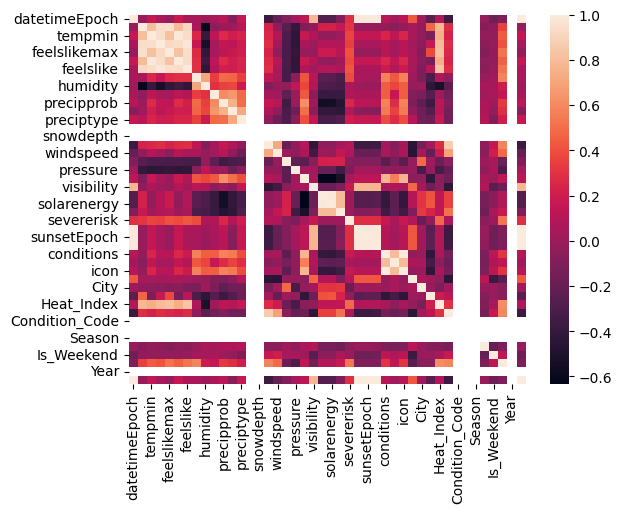

In [30]:
import seaborn as sns
correlacion = df.corr()
sns.heatmap(correlacion)

In [31]:
X = df.drop("Health_Risk_Score", axis = 1)
y = df["Health_Risk_Score"]

In [32]:
X

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Year,Day
0,1.725692e+09,106.100000,91.000000,98.500000,104.000000,88.100000,95.900000,51.500000,21.000000,0.000000,...,15.100000,95.918703,4.430000,0.0,9,0,2,True,2024,7
1,1.725779e+09,103.900000,87.000000,95.400000,100.500000,84.700000,92.300000,48.700000,21.500000,0.000000,...,16.900000,92.281316,3.880000,0.0,9,0,3,True,2024,8
2,1.725865e+09,105.000000,83.900000,94.700000,99.900000,81.600000,90.600000,41.700000,16.900000,0.000000,...,21.100000,90.599165,3.630000,0.0,9,0,1,False,2024,9
3,1.725952e+09,106.100000,81.200000,93.900000,100.600000,79.500000,89.800000,39.100000,15.700000,0.012000,...,24.900000,89.638811,2.851200,0.0,9,0,5,False,2024,10
4,1.726038e+09,106.100000,82.100000,94.000000,101.000000,80.000000,90.000000,40.100000,15.900000,0.008000,...,24.000000,89.760414,3.390800,0.0,9,0,6,False,2024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.726633e+09,76.060546,64.359387,69.002142,77.673823,63.510920,67.003338,59.936776,73.189130,0.084660,...,12.886665,71.837558,1.957318,0.0,9,0,6,False,2024,18
996,1.726550e+09,68.409198,65.939319,66.567410,68.956722,64.805635,65.992526,59.010257,74.137401,0.019847,...,2.613629,72.463491,2.537413,0.0,9,0,5,False,2024,17
997,1.726122e+09,69.756690,65.286919,65.919492,68.158536,63.662942,67.313322,62.024442,84.650482,-0.010133,...,4.598936,67.560060,3.595470,0.0,9,0,4,False,2024,12
998,1.726284e+09,77.106797,61.481724,68.106569,76.426959,60.901526,68.094309,63.169608,86.860261,-0.002440,...,15.477717,67.930437,3.498942,0.0,9,0,2,True,2024,14


In [33]:
y

,Health_Risk_Score
0,10.522170
1,10.062332
2,9.673387
3,9.411519
4,9.515179
...,...
995,8.750142
996,9.118198
997,9.880093
998,9.561602


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
X_train.shape, y_train.shape

((700, 43), (700,))

In [36]:
X_test.shape, y_test.shape

((300, 43), (300,))

In [37]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [38]:
modelo.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = modelo.predict(X_test)

In [40]:
print("La calidad del modelo es de: ", r2_score(y_test, y_pred) * 100, "%")

La calidad del modelo es de:  96.88990808334381 %


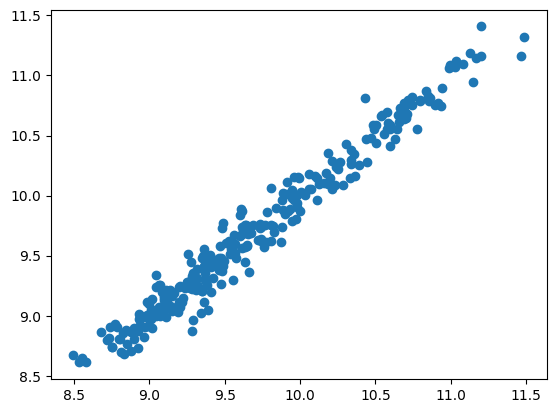

In [41]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)